#Standard Boiling Point of Water

In [18]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

Creating temperature ranges for the given experimental data on NIST Chemistry Webbook. temp_range1 is for liquid, temp_range is for the gas phase.

In [113]:
t1 = 280
t2 = 500

temp_range1 = np.linspace(t1, t2, 100)



Shomate values

In [114]:
shomate_water_liquid = [-203.6060, 1523.290, -3196.413, 2474.455, 3.855326]
shomate_water_gas = [30.09200	, 6.832514, 6.793435, -2.534480, 0.082139]


Functions to calculate the temperature specific heat capacities. Cp1 and Cp2 are meant for methanol.

In [115]:
def cp(t, s):
    return s[0] + (s[1] * t / 1000) + (s[2] * (pow((t / 1000), 2))) + (s[3] * (pow((t / 1000), 3))) + (s[4] / (pow((t/1000), 2)))
def cp1(t, s):
    return s[0] + (s[1] * t / 1000) + (s[2] * (pow((t / 1000), 2))) + (s[3] * (pow((t / 1000), 3)))
def cp2(t, s):
    return s[0] + (s[1] * t / 1000) + (s[2] * (pow((t / 1000), 2)))

Functions to calculate the integrands at specific temperature. H is for the expression used by the calculation of enthalpy, and S for entropy.

In [116]:
def integrand_h1(t):
    return cp(t, shomate_water_liquid)
def integrand_h(t):
    return cp(t, shomate_water_gas)
def integrand_s1(t):
    return cp(t, shomate_water_liquid) / t
def integrand_s(t):
    return cp(t, shomate_water_gas) / t

Creating lists for collecting the calculated data for the different phases, as well as their difference at a specific temperature.

In [120]:
enthalpie_waarden_liquid = []
entropie_waarden_liquid = []
gibbs_waarden_liquid = []

enthalpie_waarden_gas = []
entropie_waarden_gas = []
gibbs_waarden_gas = []

enthalpie_verschil = []
entropie_verschil = []
gibbs_verschil = []

As we want to show the evolution in a rather smaller range, we have chosen the temp_range1 we created before.

In [121]:
threshold = 0.02
for t in temp_range1:
    enthalpie_liquid = quad(integrand_h1, 298, t)[0]/1000 - 285.83
    entropie_liquid = quad(integrand_s1, 298, t)[0] + 69.95
    gibbs_liquid = (enthalpie_liquid)*1000 - t * entropie_liquid
    enthalpie_waarden_liquid.append(enthalpie_liquid)
    entropie_waarden_liquid.append(entropie_liquid)
    gibbs_waarden_liquid.append(gibbs_liquid/1000)

    enthalpie_gas = quad(integrand_h, 298, t)[0]/1000 + -241.83
    entropie_gas = quad(integrand_s, 298, t)[0] + 188.84
    gibbs_gas = (enthalpie_gas)*1000 - t * entropie_gas

    enthalpie_waarden_gas.append(enthalpie_gas)
    entropie_waarden_gas.append(entropie_gas)
    gibbs_waarden_gas.append(gibbs_gas/1000)

    enthalpie_verschil.append(enthalpie_gas - enthalpie_liquid)
    entropie_verschil.append(entropie_gas - entropie_liquid)
    gibbs_verschil.append(gibbs_gas/1000 - gibbs_liquid/1000)


    if abs(gibbs_liquid/1000 - gibbs_gas/1000)<threshold:
      inters = t
      print(f'Standard boiling point of water is: {inters}')


Standard boiling point of water is: 373.33333333333337


Plotting our results

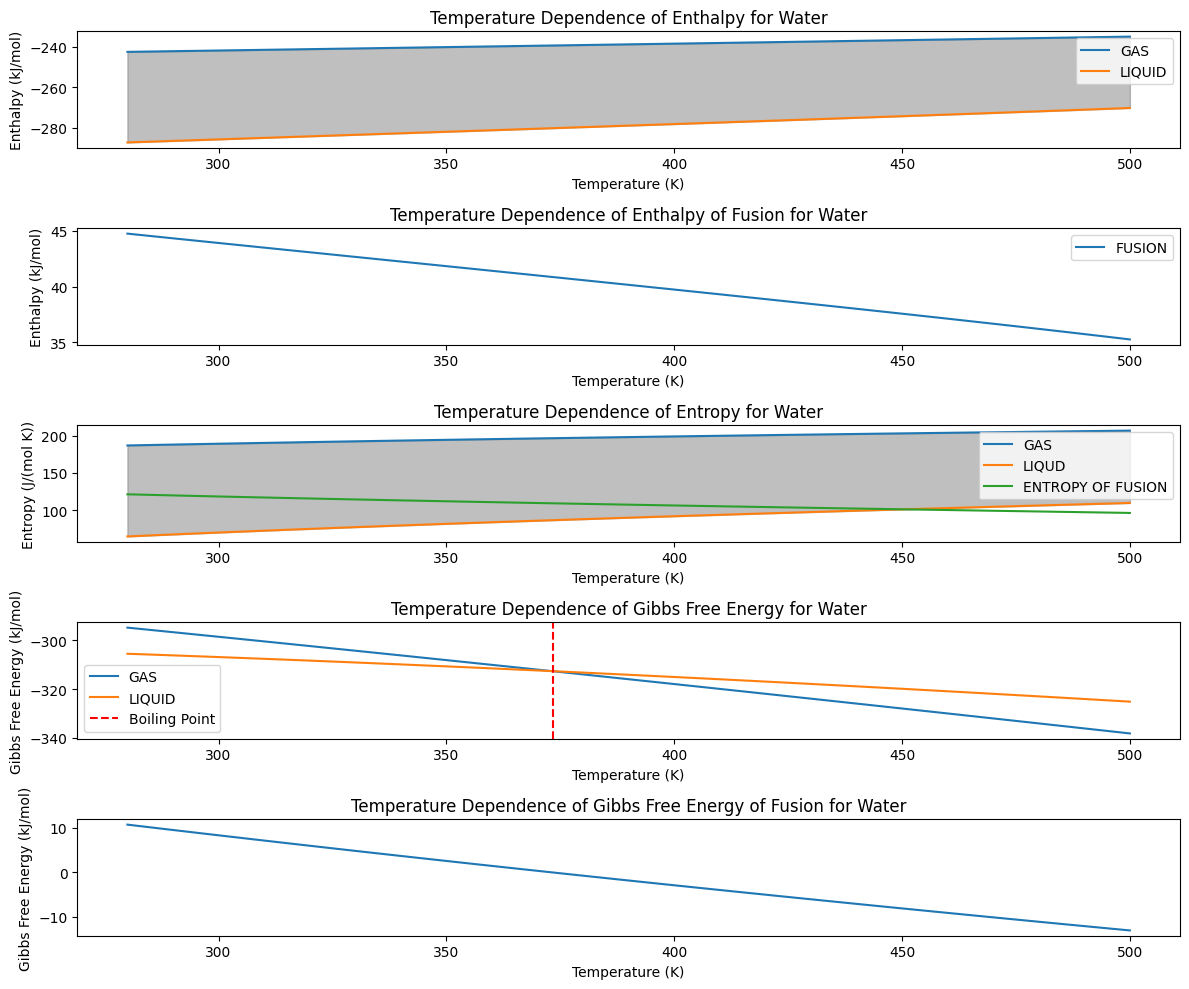

In [122]:
plt.figure(figsize=(12, 10))

# Plot for Enthalpy
plt.subplot(5, 1, 1)
plt.plot(temp_range1, enthalpie_waarden_gas, label='GAS')
plt.plot(temp_range1, enthalpie_waarden_liquid, label='LIQUID')
plt.fill_between(temp_range1, enthalpie_waarden_gas, enthalpie_waarden_liquid, color='gray', alpha=0.5)
plt.xlabel('Temperature (K)')
plt.ylabel('Enthalpy (kJ/mol)')
plt.legend()
plt.title('Temperature Dependence of Enthalpy for Water')

#Plot for enthalpy of fusion
plt.subplot(5, 1, 2)

plt.plot(temp_range1, enthalpie_verschil, label='FUSION')
plt.xlabel('Temperature (K)')
plt.ylabel('Enthalpy (kJ/mol)')
plt.legend()
plt.title('Temperature Dependence of Enthalpy of Fusion for Water')
# Plot for Entropy
plt.subplot(5, 1, 3)
plt.plot(temp_range1, entropie_waarden_gas, label='GAS')
plt.plot(temp_range1, entropie_waarden_liquid, label='LIQUD')
plt.plot(temp_range1, entropie_verschil, label='ENTROPY OF FUSION')
plt.fill_between(temp_range1, entropie_waarden_gas, entropie_waarden_liquid, color='gray', alpha=0.5)
plt.xlabel('Temperature (K)')
plt.ylabel('Entropy (J/(mol K))')
plt.legend()
plt.title('Temperature Dependence of Entropy for Water')

# Plot for Gibbs Free Energy
plt.subplot(5, 1, 4)
plt.plot(temp_range1, gibbs_waarden_gas, label='GAS')
plt.plot(temp_range1, gibbs_waarden_liquid, label='LIQUID')
plt.axvline(x=inters, color='r', linestyle='--', label='Boiling Point')

plt.xlabel('Temperature (K)')
plt.ylabel('Gibbs Free Energy (kJ/mol)')
plt.legend()
plt.title('Temperature Dependence of Gibbs Free Energy for Water')

#Plot for Gibbs fusion
plt.subplot(5, 1, 5)
plt.plot(temp_range1, gibbs_verschil, label='GAS')
plt.xlabel('Temperature (K)')
plt.ylabel('Gibbs Free Energy (kJ/mol)')
plt.title('Temperature Dependence of Gibbs Free Energy of Fusion for Water')

plt.tight_layout()
plt.show()





#Standard Boiling Point of Methanol

Since there are no available Shomate-parameters for methanol, we need to do a so called fitting to the experimental data. To this, we need to import a new module.

In [10]:
from scipy.optimize import curve_fit

Shomate function

In [11]:
def shomate_methanol_gas(t, A, B, C):
    return A + B * t + C * t**2

def shomate_methanol_liquid(t, A, B, C):
    return A + B * t + C * t**2

We know need to create arrays that will contain the Cp values by different temperatures. As NIST does not provide any data for the liquid phase, we extract data for both phases from a source that provides all for accuracy (Data extracted from: https://www.engineeringtoolbox.com/methanol-CH3OH-specific-heat-capacity-Cp-Cv-isobaric-isochoric-d_2103.html)

In [12]:
cp_data_gas = [54.21, 60.38, 67.44]
cp_data_liquid = [70.94, 81.58, 90.45]
t_data_gas = [400, 500, 600]
t_data_liquid = [200, 300, 337.3]

# Initial guesses as an array
initial_guesses_gas = [140, 0.1, 1e-6]
initial_guesses_liquid =[60.0, 0.1, 1e-5]

parameters_methanol_gas, covariance= curve_fit(shomate_methanol_gas, t_data_gas, cp_data_gas, p0=initial_guesses_gas)
parameters_methanol_liquid, covariance = curve_fit(shomate_methanol_liquid, t_data_liquid, cp_data_liquid, p0=initial_guesses_liquid)


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Defining integrand functions for methanol

In [13]:
def integrand_h_gas(t):
  return cp2(t, parameters_methanol_gas)
def integrand_s_gas(t):
  return cp2(t, parameters_methanol_gas)/t
def integrand_h_liquid(t):
  return cp2(t, parameters_methanol_liquid)
def integrand_s_liquid(t):
  return cp2(t, parameters_methanol_liquid)/t

In [126]:
enthalpie_waarden_liquid_met = []
entropie_waarden_liquid_met = []
gibbs_waarden_liquid_met = []

enthalpie_waarden_gas_met = []
entropie_waarden_gas_met = []
gibbs_waarden_gas_met = []

enthalpie_verschil_met = []
entropie_verschil_met = []
gibbs_verschil_met = []

Creating a range for data points

In [127]:
tm1 = 175.61
tm2 = 510
temp_range_met = np.linspace(tm1, tm2, 100)

In [128]:
threshold = 0.01
for t in temp_range_met:
    enthalpie_liquid = quad(integrand_h_liquid, 298, t)[0]/1000 - 239
    entropie_liquid = quad(integrand_s_liquid, 298, t)[0] +127
    gibbs_liquid = (enthalpie_liquid)*1000 - t * entropie_liquid
    enthalpie_waarden_liquid_met.append(enthalpie_liquid)
    entropie_waarden_liquid_met.append(entropie_liquid)
    gibbs_waarden_liquid_met.append(gibbs_liquid/1000)





    enthalpie_gas = quad(integrand_h_gas, 298, t)[0]/1000 + -201
    entropie_gas = quad(integrand_s_gas, 298, t)[0] + 240
    gibbs_gas = (enthalpie_gas)*1000 - (t * entropie_gas)

    enthalpie_waarden_gas_met.append(enthalpie_gas)
    entropie_waarden_gas_met.append(entropie_gas)
    gibbs_waarden_gas_met.append(gibbs_gas/1000)

    enthalpie_verschil_met.append(enthalpie_gas - enthalpie_liquid)
    entropie_verschil_met.append(entropie_gas - entropie_liquid)
    gibbs_verschil_met.append(gibbs_gas/1000 - gibbs_liquid/1000)
    if abs(gibbs_gas/1000 - gibbs_liquid/1000) <threshold:
      print(f'Standard Boiling point of Methanol: {t}')
      meth = t




Standard Boiling point of Methanol: 337.73848484848486


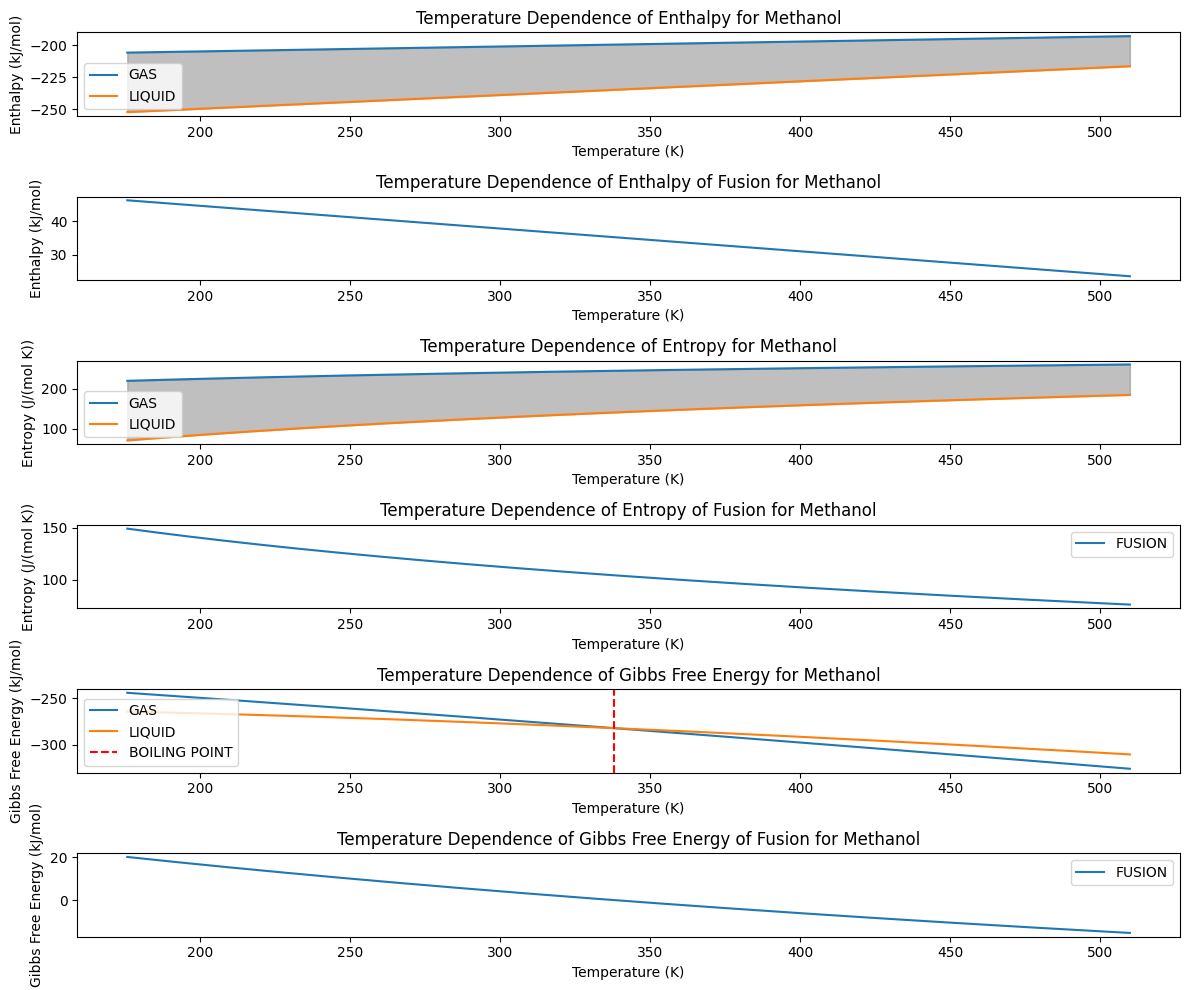

In [17]:
plt.figure(figsize=(12, 10))

# Plot for Enthalpy
plt.subplot(6, 1, 1)
plt.plot(temp_range_met, enthalpie_waarden_gas_met, label='GAS')
plt.plot(temp_range_met, enthalpie_waarden_liquid_met, label='LIQUID')
plt.fill_between(temp_range_met, enthalpie_waarden_gas_met, enthalpie_waarden_liquid_met, color='gray', alpha=0.5)
plt.xlabel('Temperature (K)')
plt.ylabel('Enthalpy (kJ/mol)')
plt.legend()
plt.title('Temperature Dependence of Enthalpy for Methanol')

#Enthalpy fusion
plt.subplot(6, 1, 2)

plt.plot(temp_range_met, enthalpie_verschil_met, label='FUSION')
plt.xlabel('Temperature (K)')
plt.ylabel('Enthalpy (kJ/mol)')
plt.title('Temperature Dependence of Enthalpy of Fusion for Methanol')

# Plot for Entropy
plt.subplot(6, 1, 3)
plt.plot(temp_range_met, entropie_waarden_gas_met, label='GAS')
plt.plot(temp_range_met, entropie_waarden_liquid_met, label='LIQUID')
plt.fill_between(temp_range_met, entropie_waarden_gas_met, entropie_waarden_liquid_met, color='gray', alpha=0.5)
plt.xlabel('Temperature (K)')
plt.ylabel('Entropy (J/(mol K))')
plt.legend()
plt.title('Temperature Dependence of Entropy for Methanol')

#Entropy fusion
plt.subplot(6, 1, 4)
plt.plot(temp_range_met, entropie_verschil_met, label='FUSION')
plt.xlabel('Temperature (K)')
plt.ylabel('Entropy (J/(mol K))')
plt.legend()
plt.title('Temperature Dependence of Entropy of Fusion for Methanol')

# Plot for Gibbs Free Energy
plt.subplot(6, 1, 5)
plt.plot(temp_range_met, gibbs_waarden_gas_met, label='GAS')
plt.plot(temp_range_met, gibbs_waarden_liquid_met, label='LIQUID')

plt.axvline(x=meth, color='r', linestyle='--', label='BOILING POINT')

plt.xlabel('Temperature (K)')
plt.ylabel('Gibbs Free Energy (kJ/mol)')
plt.legend()
plt.title('Temperature Dependence of Gibbs Free Energy for Methanol')

#Gibbs fusion
plt.subplot(6, 1, 6)
plt.plot(temp_range_met, gibbs_verschil_met, label='FUSION')
plt.xlabel('Temperature (K)')
plt.ylabel('Gibbs Free Energy (kJ/mol)')
plt.legend()
plt.title('Temperature Dependence of Gibbs Free Energy of Fusion for Methanol')

plt.tight_layout()
plt.show()
